In [1]:
using Revise

In [2]:
using CSV, DataFrames

In [3]:
data = CSV.read("../../data/task1_preprocessed.csv", DataFrame);

In [4]:
data = rename(data, Dict([(c, replace(c, "-"=>"_")) for c in names(data)]))

Row,github,successors,unresponsives,incompletes,ai,codehealth,coverage,test_runs,measured_time,estimated_time,entry_demo_1,entry_demo_2,entry_demo_3,entry_demo_4,entry_demo_5,entry_ai_1,entry_ai_2,entry_ai_3,entry_ai_4,entry_ai_5,entry_ai_6,entry_ai_7,entry_ai_8,entry_ai_9,entry_ai_10,entry_date,exit_uninterrupted,exit_used_ai,exit_ai_text,exit_ai_frequency,exit_resemblance,exit_tools_text,exit_space_1,exit_space_2,exit_space_3,exit_space_4,exit_space_5,exit_space_6,exit_space_7,exit_space_8,exit_space_9,exit_space_10,exit_final_text,exit_date,email_text,gh_commits,gh_additions,gh_deletions,gh_changes,gh_changed_files,gh_adds_unit_test,gh_adds_behavioural_test,gh_adds_functional,gh_adds_sql,gh_adds_logging,gh_adds_exception_handling,gh_adds_dependency,clean_time,pp_mean
,String,String31,Int64,Int64,String7,Float64,Float64,Float64?,String7,String7?,String15,String7,String31,String15,String15,String3,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String31,String31?,String3?,String?,String15?,Float64?,String31?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String?,String31?,String?,Int64,Int64,Int64,Int64,Int64,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Float64?,Float64?
1,anon126,3,0,0,True,8.34,0.74,10.0,3290,missing,Man,40-49,United Kingdom,Professional,Beginner,Yes,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,20/11/2024 10:55:37,Yes,Yes,"Cursor, Tailwind AI",Every statement,5.0,missing,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,missing,missing,missing,2,233,67,300,11,true,false,true,false,false,false,false,3290.0,5.0
2,anon094,1,1,1,True,8.5,0.71,missing,6601,missing,Man,30-39,Canada,Professional,Advanced,Yes,5.0,5.0,5.0,5.0,5.0,4.0,1.0,3.0,4.0,24/11/2024 18:44:55,"Yes, but breaks",Yes,GitHub Copilot,Sometimes,5.0,missing,4.0,4.0,5.0,1.0,5.0,5.0,5.0,4.0,4.0,2.0,Copilot helped me to find misspelling even in original code and did some refactoring. But I would say that the most important is to be able to debug code. Without it it doesn't matter if you use or not AI,11/26/2024 21:05:27,missing,4,135,93,228,7,false,false,true,false,false,false,false,6601.0,4.5
3,anon082,0,1,0,True,8.37,0.7,2.0,5327,missing,Man,30-39,Bulgaria,Professional,Advanced,Yes,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,23/11/2024 19:12:42,Yes,Yes,ChatGPT,Often,2.0,missing,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,5.0,2.0,"I was not sure how much I should make the task better so I did the bare minimum. Also what slowed me down was understanding that the api was somewhere else and accessing H2 from IntelliJ instead of the browser console, which was unnecessary at the end.",12/3/2024 16:34:47,missing,1,78,62,140,3,false,false,true,false,false,false,false,5327.0,4.1
4,anon126,1,2,0,True,8.88,0.91,287.0,462632,10800.0,Man,40-49,United Kingdom,Professional,Beginner,Yes,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,20/11/2024 10:55:37,No,Yes,"Cursor, Tailwind AI",Every statement,5.0,missing,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,missing,11/26/2024 19:36:21,missing,82,10788,481,11269,88,true,true,true,false,true,true,true,10800.0,5.0
5,anon009,0,0,0,True,8.22,0.7,2.0,4411980,10800.0,Woman,20-29,United Kingdom,Student,Beginner,Yes,5.0,5.0,4.0,5.0,5.0,4.0,2.0,3.0,4.0,16/11/2024 18:34:05,No,Yes,"GitHub Copilot, ChatGPT",Every statement,3.0,missing,4.0,3.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,4.0,"I tried using AI for all parts, I found that AI was good at new features, but was terrible at bug-fixing, it completely overlooked things and it took me some time to realise that api call to retrieve the data doesn't overwrite the data, but appends it, so I would manually need to clear it after implementing the fix - AI didn't help with this at all.",1/29/2025 18:28:30,"This is very approximate and reductive, but I estimate I spent: - 24th Nov - 1.0 hr - Reading and setting up - 8th Dec - 1.0 hr - Adding new functionality - 5th Jan - 1.0 hr - Bug fixing I hope this is useful and I am happy to give more information if needed.",1,46,38,84,4,false,false,tr

In [5]:
using ai_codev_study

In [6]:
data[!, :entry_ai_1] = Commons.remap_scale(data[!,:entry_ai_1], ["Yes", "No"], [true, false])

76-element Vector{Bool}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 0
 1
 1
 1
 1
 0
 0
 0
 1
 1

In [7]:
data[!,:ai_xp] = map(Commons.ai_experience, data[!,:entry_ai_1], data[!,:entry_ai_2]);

In [8]:
data

Row,github,successors,unresponsives,incompletes,ai,codehealth,coverage,test_runs,measured_time,estimated_time,entry_demo_1,entry_demo_2,entry_demo_3,entry_demo_4,entry_demo_5,entry_ai_1,entry_ai_2,entry_ai_3,entry_ai_4,entry_ai_5,entry_ai_6,entry_ai_7,entry_ai_8,entry_ai_9,entry_ai_10,entry_date,exit_uninterrupted,exit_used_ai,exit_ai_text,exit_ai_frequency,exit_resemblance,exit_tools_text,exit_space_1,exit_space_2,exit_space_3,exit_space_4,exit_space_5,exit_space_6,exit_space_7,exit_space_8,exit_space_9,exit_space_10,exit_final_text,exit_date,email_text,gh_commits,gh_additions,gh_deletions,gh_changes,gh_changed_files,gh_adds_unit_test,gh_adds_behavioural_test,gh_adds_functional,gh_adds_sql,gh_adds_logging,gh_adds_exception_handling,gh_adds_dependency,clean_time,pp_mean,ai_xp
,String,String31,Int64,Int64,String7,Float64,Float64,Float64?,String7,String7?,String15,String7,String31,String15,String15,Bool,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String31,String31?,String3?,String?,String15?,Float64?,String31?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String?,String31?,String?,Int64,Int64,Int64,Int64,Int64,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Float64?,Float64?,Int64
1,anon126,3,0,0,True,8.34,0.74,10.0,3290,missing,Man,40-49,United Kingdom,Professional,Beginner,true,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,20/11/2024 10:55:37,Yes,Yes,"Cursor, Tailwind AI",Every statement,5.0,missing,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,missing,missing,missing,2,233,67,300,11,true,false,true,false,false,false,false,3290.0,5.0,5
2,anon094,1,1,1,True,8.5,0.71,missing,6601,missing,Man,30-39,Canada,Professional,Advanced,true,5.0,5.0,5.0,5.0,5.0,4.0,1.0,3.0,4.0,24/11/2024 18:44:55,"Yes, but breaks",Yes,GitHub Copilot,Sometimes,5.0,missing,4.0,4.0,5.0,1.0,5.0,5.0,5.0,4.0,4.0,2.0,Copilot helped me to find misspelling even in original code and did some refactoring. But I would say that the most important is to be able to debug code. Without it it doesn't matter if you use or not AI,11/26/2024 21:05:27,missing,4,135,93,228,7,false,false,true,false,false,false,false,6601.0,4.5,5
3,anon082,0,1,0,True,8.37,0.7,2.0,5327,missing,Man,30-39,Bulgaria,Professional,Advanced,true,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,23/11/2024 19:12:42,Yes,Yes,ChatGPT,Often,2.0,missing,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,5.0,2.0,"I was not sure how much I should make the task better so I did the bare minimum. Also what slowed me down was understanding that the api was somewhere else and accessing H2 from IntelliJ instead of the browser console, which was unnecessary at the end.",12/3/2024 16:34:47,missing,1,78,62,140,3,false,false,true,false,false,false,false,5327.0,4.1,5
4,anon126,1,2,0,True,8.88,0.91,287.0,462632,10800.0,Man,40-49,United Kingdom,Professional,Beginner,true,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,20/11/2024 10:55:37,No,Yes,"Cursor, Tailwind AI",Every statement,5.0,missing,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,missing,11/26/2024 19:36:21,missing,82,10788,481,11269,88,true,true,true,false,true,true,true,10800.0,5.0,5
5,anon009,0,0,0,True,8.22,0.7,2.0,4411980,10800.0,Woman,20-29,United Kingdom,Student,Beginner,true,5.0,5.0,4.0,5.0,5.0,4.0,2.0,3.0,4.0,16/11/2024 18:34:05,No,Yes,"GitHub Copilot, ChatGPT",Every statement,3.0,missing,4.0,3.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,4.0,"I tried using AI for all parts, I found that AI was good at new features, but was terrible at bug-fixing, it completely overlooked things and it took me some time to realise that api call to retrieve the data doesn't overwrite the data, but appends it, so I would manually need to clear it after implementing the fix - AI didn't help with this at all.",1/29/2025 18:28:30,"This is very approximate and reductive, but I estimate I spent: - 24th Nov - 1.0 hr - Reading and setting up - 8th Dec - 1.0 hr - Adding new functionality - 5th Jan - 1.0 hr - Bug fixing I hope this is useful and I am happy to give more information if needed.",1,46,

In [9]:
using Turing, StatsPlots

In [10]:
unique(data[!,:entry_demo_5])

3-element Vector{String15}:
 "Beginner"
 "Advanced"
 "Intermediate"

In [11]:
data[!,:ai] = Commons.remap_scale(data[!,:ai], ["True", "False"], [true, false])

76-element Vector{Bool}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [12]:
model = Models.bias_analysis(
    indexin(data[!,:entry_demo_1], ["Man", "Woman", "Undisclosed"]),
    indexin(data[!,:entry_demo_2], ["20-29", "30-39", "40-49", "50-59", "60-69"]),
    indexin(data[!,:entry_demo_4], ["Professional", "Student", "Researcher", "Hobbyist"]),
    indexin(data[!,:entry_demo_5], ["Beginner", "Intermediate", "Advanced"]), 
    convert.(Integer, data[!,:ai_xp]), 
    data[!,:ai])

DynamicPPL.Model{typeof(ai_codev_study.Models.bias_analysis), (:gender, :age_group, :background, :dev1exp, :ai_xp, :ai_use), (), (), Tuple{Vector{Union{Nothing, Int64}}, Vector{Union{Nothing, Int64}}, Vector{Union{Nothing, Int64}}, Vector{Union{Nothing, Int64}}, Vector{Int64}, Vector{Bool}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.bias_analysis, (gender = Union{Nothing, Int64}[1, 1, 1, 1, 2, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 2, 1, 1, 1], age_group = Union{Nothing, Int64}[3, 2, 2, 3, 1, 2, 2, 1, 5, 2  …  1, 2, 2, 3, 5, 2, 2, 2, 3, 1], background = Union{Nothing, Int64}[1, 1, 1, 1, 2, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dev1exp = Union{Nothing, Int64}[1, 3, 3, 1, 1, 3, 1, 2, 3, 1  …  1, 2, 2, 2, 3, 2, 3, 3, 2, 3], ai_xp = [5, 5, 5, 5, 5, 5, 4, 5, 4, 4  …  1, 2, 3, 2, 2, 1, 1, 1, 3, 1], ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), NamedTuple(), DynamicPPL.DefaultContext())

In [13]:
chain = sample(model, NUTS(), MCMCThreads(), 1000, 4)

┌ Info: Found initial step size
└   ϵ = 0.2
┌ Info: Found initial step size
└   ϵ = 0.4
┌ Info: Found initial step size
└   ϵ = 0.2
┌ Info: Found initial step size
└   ϵ = 0.4


Chains MCMC chain (1000×38×4 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 4
Samples per chain = 1000
Wall duration     = 44.72 seconds
Compute duration  = 170.41 seconds
parameters        = intercept, sigma_gender, effect_gender_z[1], effect_gender_z[2], effect_gender_z[3], effect_age, effect_age_group_factor[1], effect_age_group_factor[2], effect_age_group_factor[3], effect_age_group_factor[4], effect_age_group_factor[5], sigma_background, effect_background_z[1], effect_background_z[2], effect_background_z[3], effect_background_z[4], effect_skill, effect_skill_factor[1], effect_skill_factor[2], effect_skill_factor[3], effect_ai, effect_ai_xp_factor[1], effect_ai_xp_factor[2], effect_ai_xp_factor[3], effect_ai_xp_factor[4], effect_ai_xp_factor[5]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Sta

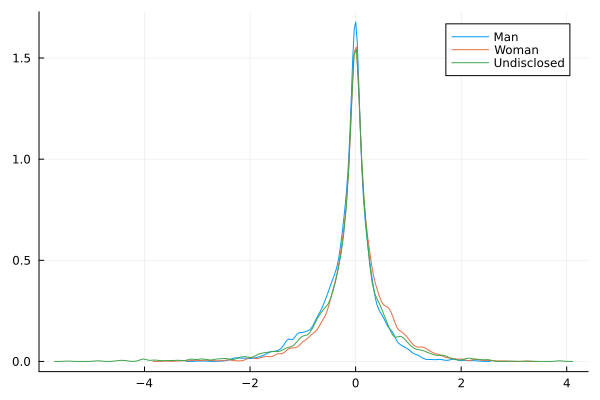

In [14]:
# Gender
p = plot()

genders = ["Man", "Woman", "Undisclosed"]

for g in 1:3
    density!(chain["effect_gender_z[$g]"] .* chain["sigma_gender"] |> vec, label=genders[g])
end

p

Gender doesn't seem to matter much. 

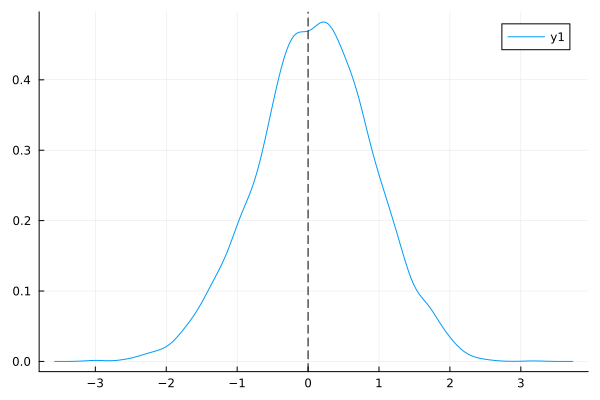

In [15]:
# Age
density(chain["effect_age"] |> vec) |> Commons.plotzero!

Age doesn't seem to matter either.

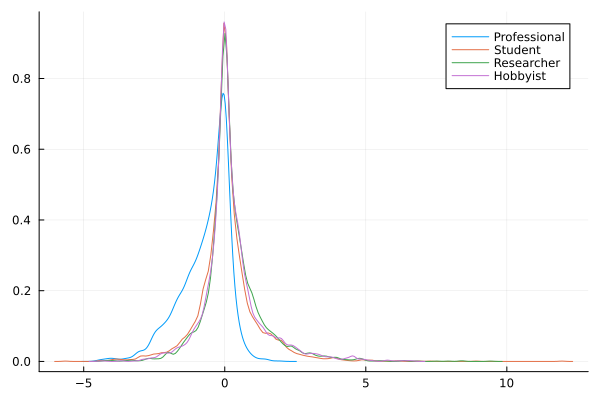

In [16]:
# Background

p = plot()

backgrounds = ["Professional", "Student", "Researcher", "Hobbyist"]

for b in 1:4
    density!(p, chain["effect_background_z[$b]"] .* chain["sigma_background"] |> vec, 
        label=backgrounds[b])
end

p


In [17]:
combine(groupby(data, [:ai, :entry_demo_4]), :ai => length)

Row,ai,entry_demo_4,ai_length
,Bool,String15,Int64
1,false,Professional,37
2,true,Professional,34
3,true,Student,1
4,true,Researcher,2
5,true,Hobbyist,2


The other coefficients are almost zero, because there's so little data. For professionals, I think we can exclude it.

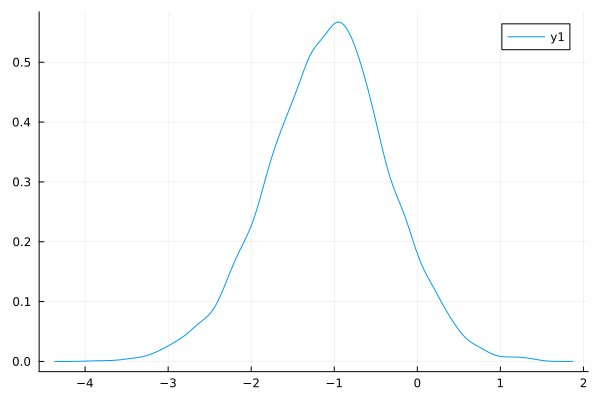

In [18]:
# Skill level

density(chain[:effect_skill] |> vec)

Skilled developers were a bit less likely to use AI, this is visible.

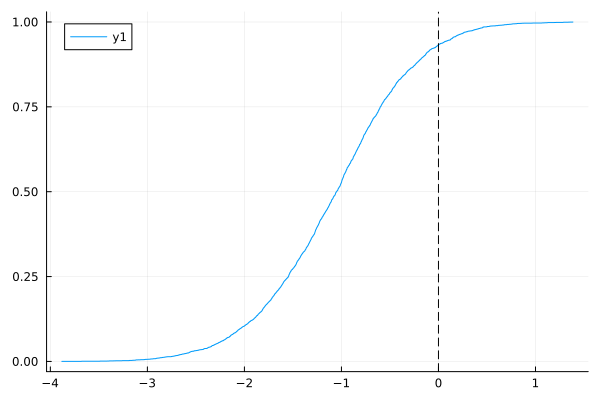

In [19]:
ecdfplot(chain[:effect_skill] |> vec) |> Commons.plotzero!

The distribution is about 90% under the zero line, so it seems having a high experience in Java has a significant effect.

In [20]:
combine(groupby(data, [:entry_demo_5, :ai]), :ai => length)

Row,entry_demo_5,ai,ai_length
,String15,Bool,Int64
1,Beginner,false,1
2,Beginner,true,7
3,Advanced,false,24
4,Advanced,true,20
5,Intermediate,false,12
6,Intermediate,true,12


We can see more Advanced developers in the all-human group, more beginners in the AI group, but there were less "Beginner" developers overall.

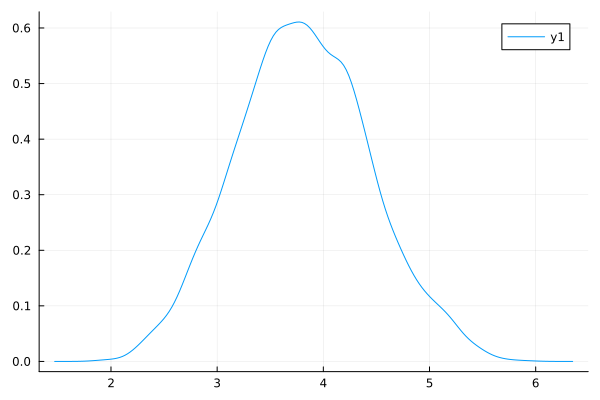

In [21]:
# AI XP

density(chain[:effect_ai] |> vec)

Developers who had used AI before where in the group which used AI.

# Conclusions

We should control by dev experience and AI experience. 